In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dataset = pd.read_csv('Dataset.csv')

In [ ]:
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
dataset.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
dataset['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
dataset['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
x = dataset.drop(columns = ['label'])
y = dataset['label']
lab = LabelEncoder()
y = lab.fit_transform(y)
print(y)

[20 20 20 ...  5  5  5]


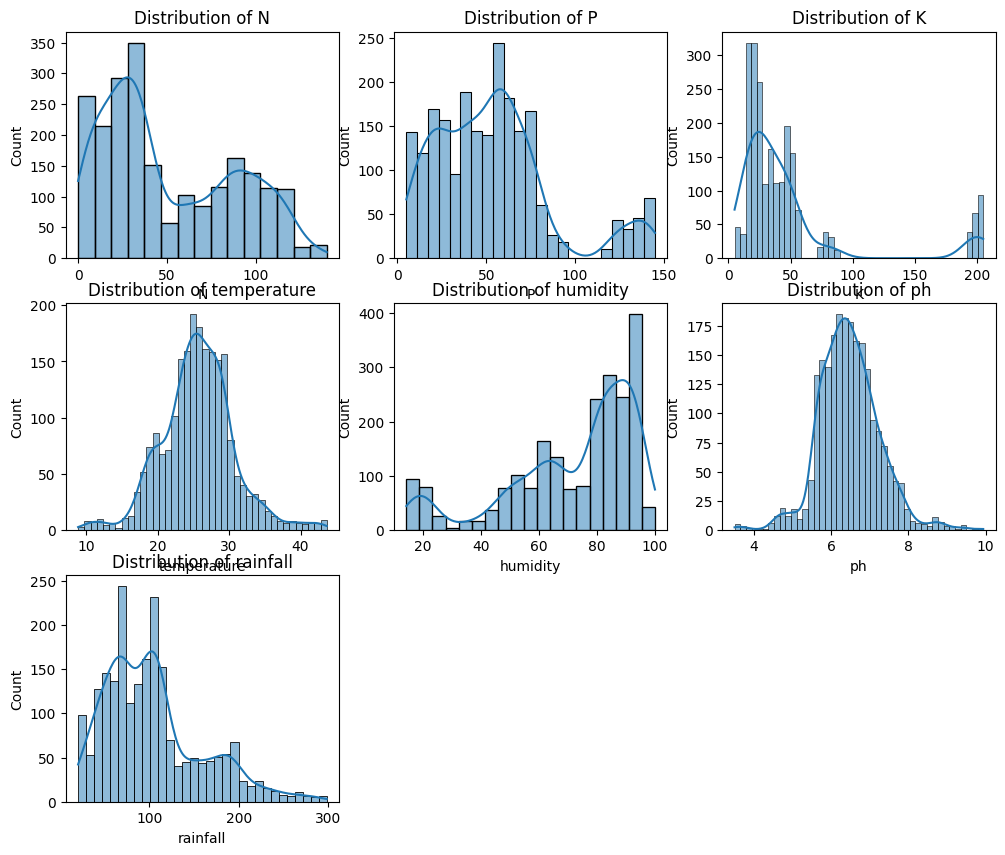

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = dataset.drop(columns = ['label'])
plt.figure(figsize=(12,10))
x=0
for i, column in enumerate(df.columns):
    plt.subplot(len(df.columns) // 3 + 1, 3, i + 1)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
x_train = scaling.fit_transform(x_train)
x_test = scaling.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

models = {
    'LogisticRegression': LogisticRegression(penalty='l2', C=1.0),
    'Naive Bayes' : GaussianNB(),
    'Support Vector Machine' : SVC(probability = True),
    'K-Nearest Neighbors' : KNeighborsClassifier(n_neighbors=5),
    'Decision Tree' : DecisionTreeClassifier(max_depth=10),
    'Random Forest' : RandomForestClassifier(max_depth=10, n_estimators=100, random_state=1),
    'Bagging' : BaggingClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier()
}

trained_model_list = []
model_list = []
r2_list = []

y_train = y_train[:, 0] if len(y_train.shape) > 1 else y_train
y_test = y_test[:, 0] if len(y_test.shape) > 1 else y_test

def evaluate_model(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return conf_matrix , class_report , accuracy*100

for model_name, model in models.items():
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    conf_matrix , class_report , accuracy = evaluate_model(y_test, y_pred)

    print(model_name)
    model_list.append(model_name)

    print('\nModel Training Performance')
    print("\nConfusion Matrix: \n", conf_matrix)
    print("\nClassification Report: \n", class_report)
    print("\nAccuracy Score: ", accuracy)

    print('=' * 35)
    print('\n')

LogisticRegression

Model Training Performance

Confusion Matrix: 
 [[31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 44  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  1  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 25  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0 

In [ ]:
#Random Forest is the best Model with Accuracy Score (99.69696969696969)
import pickle

Random_Forest_model = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=1)
Random_Forest_model.fit(x_train, y_train)

pickle_filename = 'model.pkl'
with open(pickle_filename, 'wb') as file:
    pickle.dump(model, file)

print(f'Model saved to {pickle_filename}')

Model saved to model.pkl


In [ ]:
with open(pickle_filename, 'rb') as file:
    loaded_model = pickle.load(file)

y_pred = loaded_model.predict(x_test)

print('Predictions:\n', y_pred)

Predictions:
 [ 7 15  9 15  8 21  9 16  8 18 19  8  5 12 13  1  1  4  1 16 10  0 19 17
 15  1  7  4  6 21 11 11 15  0 13  6 12  2 14 16 18  7 16 17  4 19 17  5
  3  8  3 11 10 19  5 14 21 21  6 12  2 14 19  1  5 15  3  7  0  8  7 12
 16 11 20 21 21 11  6 12  3  1  0 16  6  2  6 12 13 19  8 18  7 21 14 14
  9  6  7 14  1  8 17 13  4 17 19  1  6 11 14  0 19  3 15 10  2 12 11  5
  2  8 15  6  9  3  9 13 21 14 20 10 16  0  9  3  6  4  3 14 10  2  5 18
 15 19 17 10 13 21 14  4 10 17 12 14 11  2  6  8 20  8  7 17 21 18 14  0
 13  3 18  4 18 10  7  8 20 20  6  7  6  7  6 15  2 19  5 17  7  1 21 16
  1  0 15 14 10  7  8 20  4  2 15 14 18 20 11 10  1 19 21  8  8  9 15 11
  8 10  5  5 13  8  9  6 11 15  0  2 15  7 10 15  0  5  7 12  0  7  3  5
 15 15  9  8 15 21 19 13 18 19  7 19 15  3 13 19 16 15  6 11 13 11 18  0
  0 21  2  1  6  4  7  0  4  2 12 15  8  1 14 19 14 12 13 14  9 13  7 11
  1  9 20  4  1  7 15  9 18  5  6 14  6  3  7  0 15  7 20 21 15 20  5  7
  0 11  7 19 13  9 12 16  2 11  4  9 